# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

#### Imports

In [493]:
# Usuals
import os
import pandas as pd
import numpy as np
import math
from scipy import stats

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Functions
from functions import *

# Etc.


# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- **Data Import:** Import the dataset into a statistical software tool such as Python or R.
- **Data Description:** Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- **Data Cleaning:** Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- **Data Visualization:** Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- **Outlier Detection:** Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- **Correlation Analysis:** Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- **Data Transformation:** If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- **Feature Selection:** Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Data Import, Description, Cleaning

#### Data Import

In [446]:
data = pd.read_csv('data/Wholesale_Data.csv')

data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [498]:
# Output path for later...
data_path = 'data/'
outputs_path = 'data/processed/'

In [ ]:
# os.path.exists(data_path)
# os.path.exists(outputs_path)

True

#### Data Description

In [447]:
data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [448]:
data.columns

# ['Channel', 'Region'] -- Nominal
# ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] -- Continuous

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [449]:
data.describe().T

count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Channel               2.00       2.0  
Region                3.00       3.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0

- There are no null values.
- The **min** values of the numerical columns seems extremely low compared to its **max**.
    - There may be outliers...
    - The data is definitely skewed... (log scaling...)
    - The columns have different scales... (standardize/normalize...)

In [450]:
# Using a custom function to get a quick overview of the data, the values in its columns and what they look like.
overview = cols_overview(data)

overview.head()

nulls_count col_name                                          col_dtype  \
0            0  Channel  Channel
<class 'int'>    440
Name: count, dtyp...   
1            0   Region  Region
<class 'int'>    440
Name: count, dtype...   
2            0    Fresh  Fresh
<class 'int'>    440
Name: count, dtype:...   
3            0     Milk  Milk
<class 'int'>    440
Name: count, dtype: ...   
4            0  Grocery  Grocery
<class 'int'>    440
Name: count, dtyp...   

   nunique                                             unique  \
0        2                                             [2, 1]   
1        3                                          [3, 1, 2]   
2      433  [12669, 7057, 6353, 13265, 22615, 9413, 12126,...   
3      421  [9656, 9810, 8808, 1196, 5410, 8259, 3199, 495...   
4      430  [7561, 9568, 7684, 4221, 7198, 5126, 6975, 942...   

                          col_data_1                          col_data_2  
0                    [2, 2, 2, 1, 2]                     [1, 1, 2, 1, 1]  
1                    [3, 3, 3, 3, 3]                     [3, 3, 3, 3, 3]  
2  [12669, 7057, 6353, 13265, 22615]  [29703, 39228, 14531, 10290, 2787]  
3     [9656, 9810, 8808, 1196, 5410]    [12051, 1431, 15488, 1981, 1698]  
4     [7561, 9568, 7684, 4221, 7198]     [16027, 764, 30243, 2232, 2510]

In [451]:
# No real need to change the data types of the columns... but to save memory, we can change the categorical columns to int8.
data['Channel'] = data['Channel'].astype('int8') # The values are 1 and 2.
data['Region'] = data['Region'].astype('int8') # The values are 1, 2, and 3.

# The rest of the columns could be changed to int16, but it's not necessary.

##### Data Cleaning

In [452]:
data.duplicated().sum() # No duplicates

0

In [453]:
# None of the columns have missing values
# No duplicates
# Not a lot of cleaning to do.

### Data Visualization

In [454]:
img_path = 'images/' # Path to save the images for later...
os.path.exists(img_path)

True

In [455]:
# Colors
palette_a = sns.color_palette("viridis", len(data.columns[2:]))
palette_b = palette_a[::-1]

##### Part 1 -- Histogram

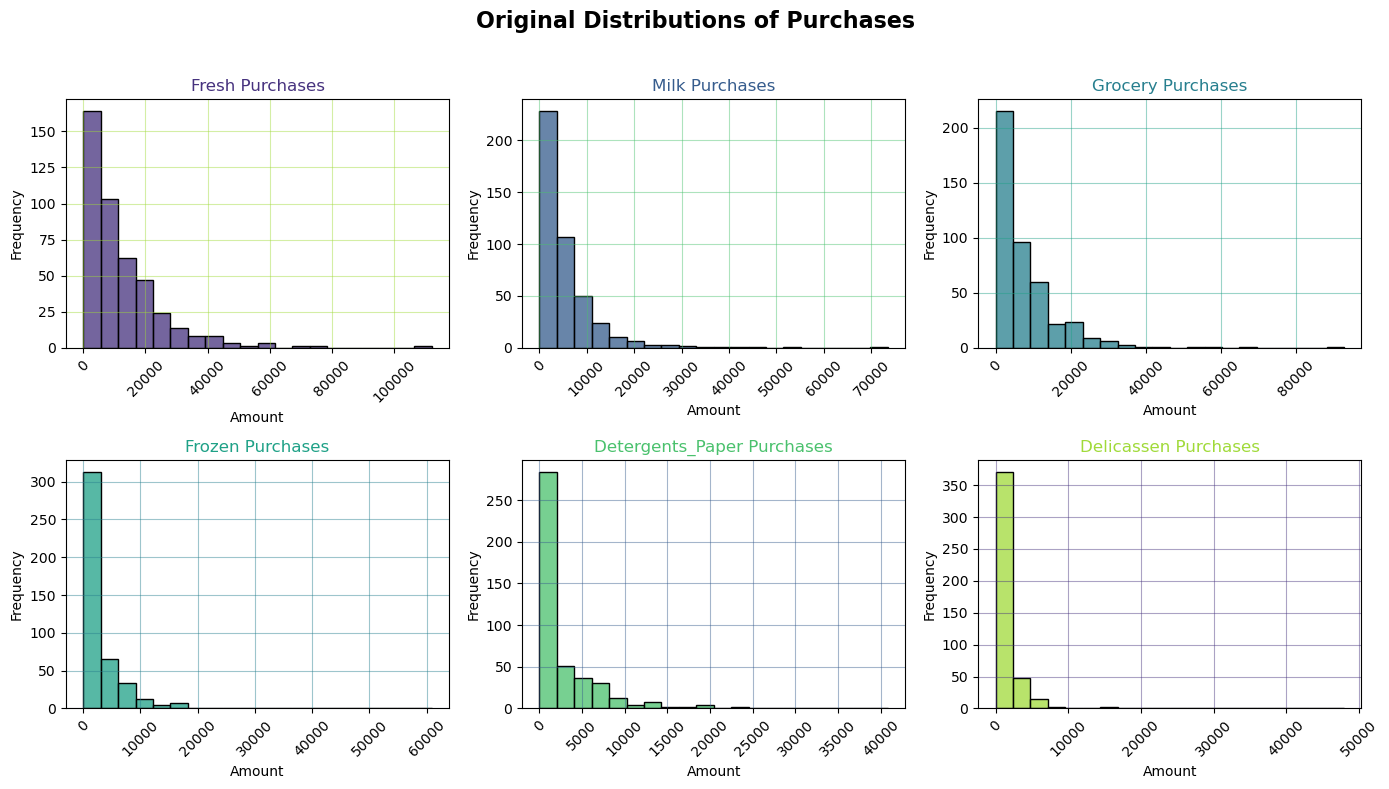

In [456]:
# Histogram for the continuous columns
columns = data.columns[2:]

num_cols = len(columns)
num_rows = (num_cols + 2) // 3 
num_cols_per_row = min(num_cols, 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(14, 8))
axes = axes.flatten()

# Subplots
for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=data,
                 x=col,
                 ax=ax,
                 bins=20,
                 fill=True,
                 color=palette_a[i],
                 edgecolor='black')
    ax.set_title(f'{col} Purchases',
                 fontsize=12,
                 fontweight='medium',
                 color=palette_a[i])
    ax.set_xlabel('Amount',
                  fontsize=10)
    ax.set_ylabel('Frequency',
                  fontsize=10)
    ax.grid(True,
            alpha=.45,
            color=palette_b[i])
    ax.tick_params(axis='x',
                   rotation=45)

# The rest...
fig.suptitle("Original Distributions of Purchases",
             fontsize=16,
             fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}Orig_Distributions.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

  > The columns appear to be right-skewed.

##### Part 2 -- Scatter Plot

In [457]:
# Numericals
nums = data.select_dtypes(include='int64') # Should exclude the categorical columns (Channel, Region), since I converted those to int8

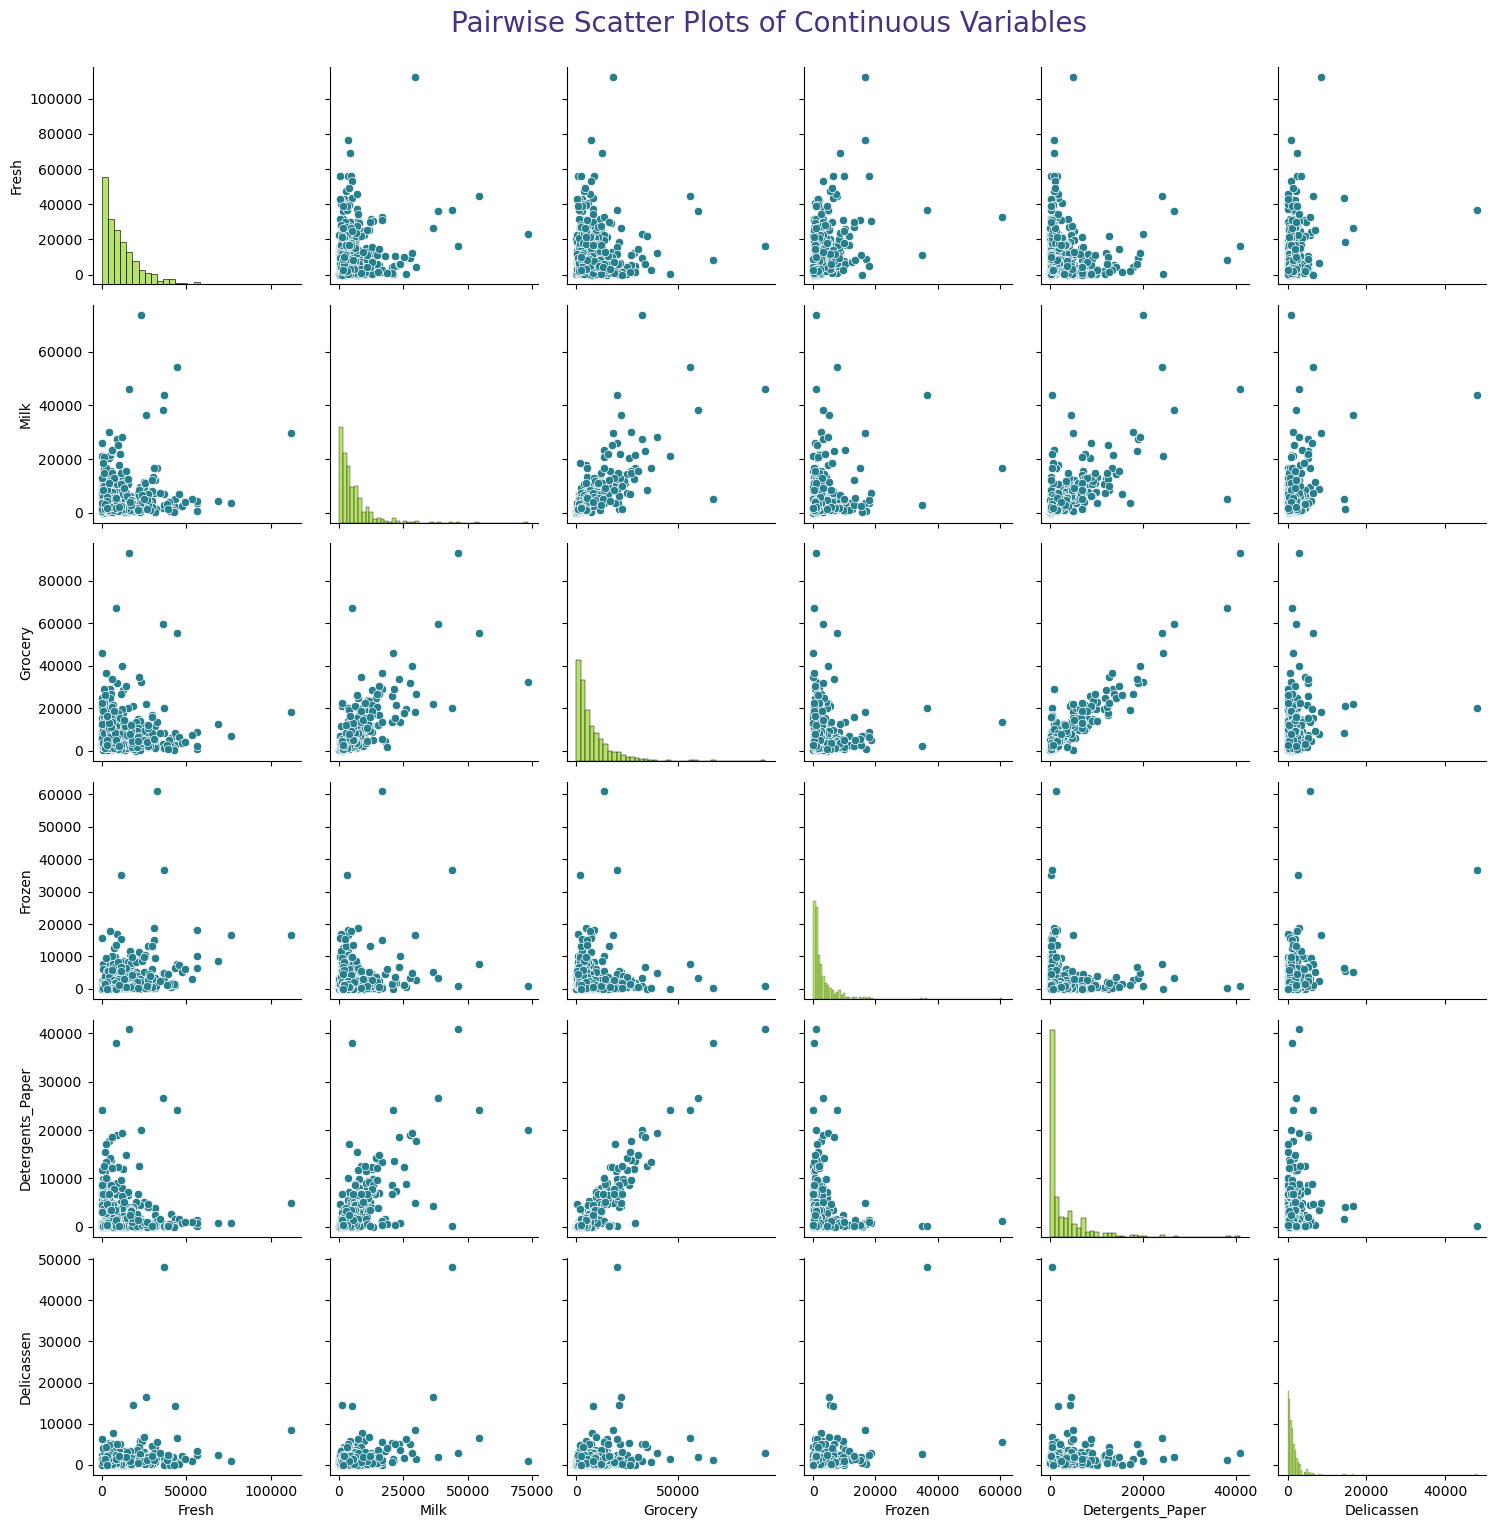

In [458]:
# Plotting
pair_plot = sns.PairGrid(nums)
pair_plot = pair_plot.map_diag(sns.histplot,
                               color=palette_a[5])
pair_plot = pair_plot.map_offdiag(sns.scatterplot,
                                  color=palette_a[2])

plt.suptitle("Pairwise Scatter Plots of Continuous Variables",
             fontsize=20,
             fontweight='medium',
             color=palette_a[0],
             y=1.02)

#plt.tight_layout()
plt.savefig(f'{img_path}Pairwise_Scatter_Plots.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

- **Grocery** purchasing appear to be positively correlated to **Detergents_Paper** and  **Milk** purchases.

  > We can check.

##### Part 3 -- Correlation Heatmap

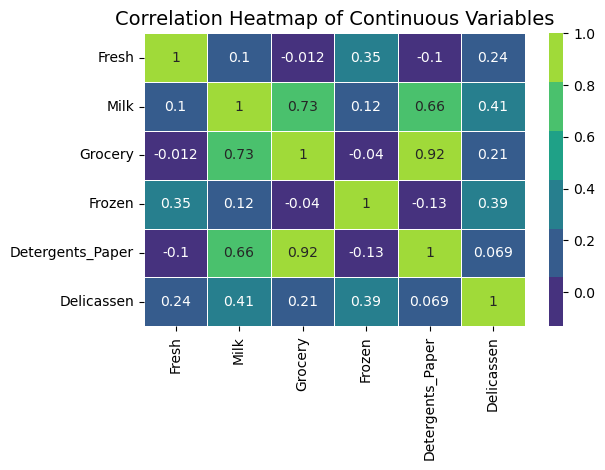

In [459]:
# Calculate the correlation heatmap
correlation_matrix = nums.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap=palette_a,
            linewidths=.5)

plt.title("Correlation Heatmap of Continuous Variables",
          fontsize=14,
          fontweight='medium')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'{img_path}Correlation_Heatmap.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

Positive Correlations:
- **Milk** is positively correlated to both Grocery and Detergents_Paper
- **Grocery** is positively correlated to both Milk and Detergents_Paper
- **Detergents_Paper** is positively correlated to both Milk and Grocery.

### Outlier Detection

##### Z-Score method...

In [460]:
# Checking Outliers
z_scores = np.abs(stats.zscore(nums))
threshold = 3 # Rule of thumb
outliers_z = np.where(z_scores > threshold)

print("Z-Score - Outliers:")
print('Row Nums: \n', outliers_z[0])
print('Columns: \n', outliers_z[1])

Z-Score - Outliers:
Row Nums: 
 [ 23  23  39  47  47  47  56  56  61  61  61  65  65  71  85  85  85  86
  86  87  92  93 103 103 125 181 181 183 183 183 196 211 211 211 216 251
 258 259 284 325 333 333 413]
Columns: 
 [1 5 0 1 2 4 1 4 1 2 4 2 4 5 1 2 4 1 4 5 4 3 0 3 0 0 1 1 3 5 3 1 2 4 2 4 0
 0 0 3 2 4 3]


In [461]:
dictionary = {
  'Row_Nums': outliers_z[0],
  'Columns': outliers_z[1],
  'Column_Name': [columns[i] for i in outliers_z[1]],
}

# Creating a DataFrame
outliers_df = pd.DataFrame(dictionary)
outliers_df.head()

Row_Nums  Columns Column_Name
0        23        1        Milk
1        23        5  Delicassen
2        39        0       Fresh
3        47        1        Milk
4        47        2     Grocery

In [462]:
# display outlier rows for each column from nums
for col in columns:
    print(f'Outliers for {col}: {len(outliers_df[outliers_df["Column_Name"] == col])}')
    display(nums.iloc[outliers_df[outliers_df['Column_Name'] == col]['Row_Nums']])
    print('===========================================')

Outliers for Fresh: 7


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
39    56159    555      902   10002               212        2916
103   56082   3504     8906   18028              1480        2498
125   76237   3473     7102   16538               778         918
181  112151  29627    18148   16745              4948        8550
258   56083   4563     2124    6422               730        3321
259   53205   4959     7336    3012               967         818
284   68951   4411    12609    8692               751        2406

Outliers for Milk: 9


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
23    26373  36423    22019    5154              4337       16523
47    44466  54259    55571    7782             24171        6465
56     4098  29892    26866    2616             17740        1340
61    35942  38369    59598    3254             26701        2017
85    16117  46197    92780    1026             40827        2944
86    22925  73498    32114     987             20070         903
181  112151  29627    18148   16745              4948        8550
183   36847  43950    20170   36534               239       47943
211   12119  28326    39694    4736             19410        2870

Outliers for Grocery: 7


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
47   44466  54259    55571    7782             24171        6465
61   35942  38369    59598    3254             26701        2017
65      85  20959    45828      36             24231        1423
85   16117  46197    92780    1026             40827        2944
211  12119  28326    39694    4736             19410        2870
216   2532  16599    36486     179             13308         674
333   8565   4980    67298     131             38102        1215

Outliers for Frozen: 6


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
93   11314   3090     2062   35009                71        2698
103  56082   3504     8906   18028              1480        2498
183  36847  43950    20170   36534               239       47943
196  30624   7209     4897   18711               763        2876
325  32717  16784    13626   60869              1272        5609
413   4983   4859     6633   17866               912        2435

Outliers for Detergents_Paper: 10


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
47   44466  54259    55571    7782             24171        6465
56    4098  29892    26866    2616             17740        1340
61   35942  38369    59598    3254             26701        2017
65      85  20959    45828      36             24231        1423
85   16117  46197    92780    1026             40827        2944
86   22925  73498    32114     987             20070         903
92    9198  27472    32034    3232             18906        5130
211  12119  28326    39694    4736             19410        2870
251   6134  23133    33586    6746             18594        5121
333   8565   4980    67298     131             38102        1215

Outliers for Delicassen: 4


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
23   26373  36423    22019    5154              4337       16523
71   18291   1266    21042    5373              4173       14472
87   43265   5025     8117    6312              1579       14351
183  36847  43950    20170   36534               239       47943

In [463]:
# Rows that are outliers in multiple columns:
multiples = outliers_df['Row_Nums'].value_counts()

multiples.head()

Row_Nums
211    3
47     3
183    3
61     3
85     3
Name: count, dtype: int64

In [464]:
# Drop the rows that are outliers in multiple columns 2+
outliers = multiples[multiples > 1].index
data = data.drop(outliers)
nums = nums.drop(outliers)

In [465]:
data.shape, nums.shape

((428, 8), (428, 6))

In [466]:
# For the rest of the outliers, I'm going to implement a min-max value...
for col in nums.columns:
    max_val = nums[col].quantile(.95)
    min_val = nums[col].quantile(.05)
    nums[col] = np.clip(nums[col], min_val, max_val)

##### Visually checking the outliers with boxplots...

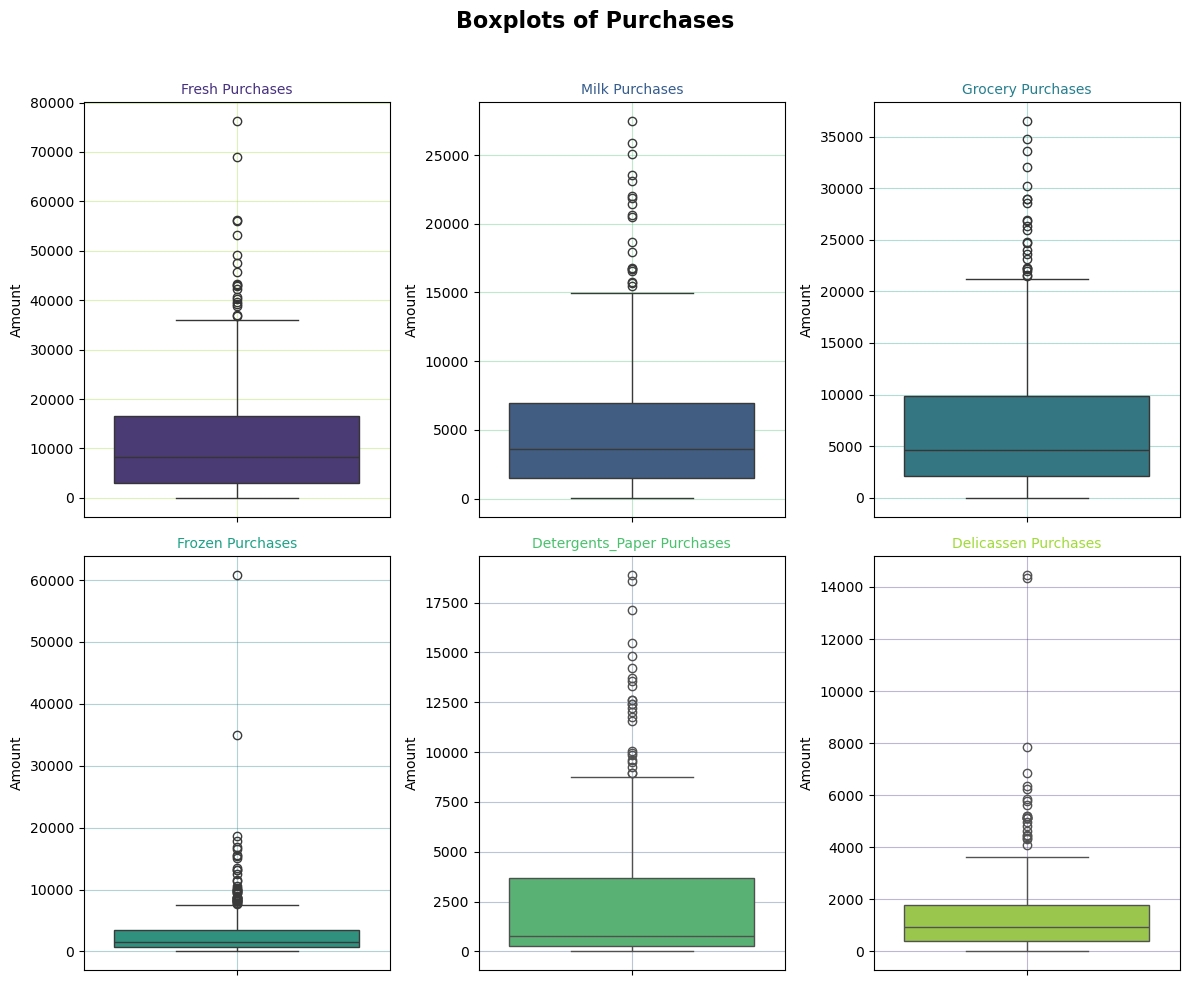

In [467]:
# Grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(12,10))
axes = axes.flatten()

# Boxplot's subplots...
for i, col in enumerate(columns):
    ax = axes[i]
    sns.boxplot(data=data,
                y=col,
                ax=ax,
                color=palette_a[i])
    ax.set_title(f'{col} Purchases',
                 fontsize=10,
                 color=palette_a[i])
    ax.set_ylabel('Amount')
    ax.grid(True,
            alpha=.35,
            color=palette_b[i])
    
# The rest...
fig.suptitle("Boxplots of Purchases",
             fontsize=16,
             fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}Boxplots.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

##### Correlation Analysis

Re-checking the correlations after the outliers have been dealt with.

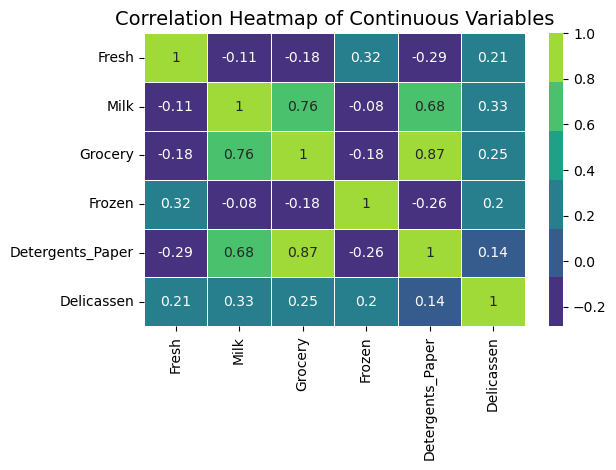

In [468]:
# Calculate the correlation matrix
correlation_matrix = nums.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap=palette_a,
            linewidths=.5)

plt.title("Correlation Heatmap of Continuous Variables",
          fontsize=14,
          fontweight='medium')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'{img_path}Correlation_Heatmap_2.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

> The positive correlations initially observed are still present.

### Data Transformation

In [469]:
# Skew Check...
skew = nums.skew().sort_values(ascending=False)

print(f'Original Skewness: \n{skew}') # I'm transforming values greater than .7 or less than -.7, so all...

Original Skewness: 
Frozen              1.432486
Detergents_Paper    1.340104
Delicassen          1.252126
Grocery             1.166998
Milk                1.053473
Fresh               0.932070
dtype: float64


Log Transform...

In [470]:
# Log transformation
nums = np.log1p(nums)

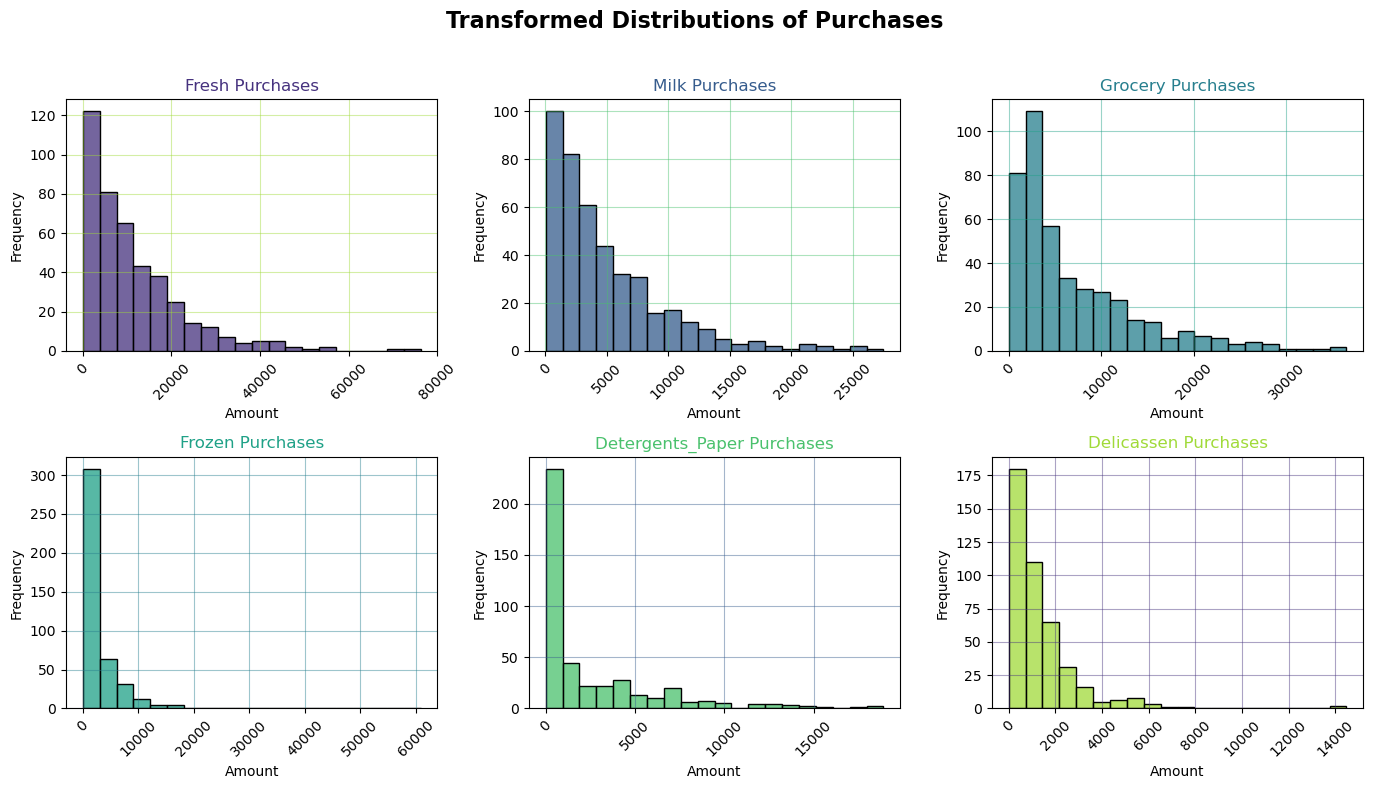

In [471]:
# Histogram for the continuous columns
fig, axes = plt.subplots(num_rows, 3, figsize=(14, 8))
axes = axes.flatten()

# Visualize again...
for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=data,
                 x=col,
                 ax=ax,
                 bins=20,
                 fill=True,
                 color=palette_a[i],
                 edgecolor='black')
    ax.set_title(f'{col} Purchases',
                 fontsize=12,
                 fontweight='medium',
                 color=palette_a[i])
    ax.set_xlabel('Amount',
                  fontsize=10)
    ax.set_ylabel('Frequency',
                  fontsize=10)
    ax.grid(True,
            alpha=.45,
            color=palette_b[i])
    ax.tick_params(axis='x',
                   rotation=45)

# The rest...
fig.suptitle("Transformed Distributions of Purchases",
             fontsize=16,
             fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}Log_Distributions.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [472]:
# Skew Check...
skew = nums.skew().sort_values(ascending=False)

print(f'Transformed Skewness: \n{skew}') # The skewness are now within acceptable ranges

Transformed Skewness: 
Detergents_Paper   -0.020348
Grocery            -0.025571
Milk               -0.165590
Frozen             -0.234063
Delicassen         -0.608970
Fresh              -0.764459
dtype: float64


### Feature Selection

In [488]:
print('Data --- >', data.shape)
print('Numericals --- >', nums.shape) # No categorical columns

Data --- > (428, 15)
Numericals --- > (428, 13)


In [474]:
columns = data.columns[2:]

#### Adding new features...

In [ ]:
###### Note to self:
# All continuous variables were log transformed -- Due to skewness.
# The ratio columns were sqrt transformed -- Due to skewness.

# We did NOT do any transformations on 'data' columns, just 'nums'.

##### Total_Purchases

> Sum of all product categories to get the total spending by each customer.

In [475]:
# Adding a feature for the total purchases made by each client
data['Total_Purchases'] = data[columns].sum(axis=1)
nums['Total_Purchases'] = data[columns].sum(axis=1)

In [476]:
# Check for skewness
print(f'Total Purchases Skewness: {nums["Total_Purchases"].skew()}')

Total Purchases Skewness: 1.3500412504273427


In [477]:
# Transforming
nums['Total_Purchases'] = np.log1p(nums['Total_Purchases'])

In [478]:
# Check for skewness again
print(f'Total Purchases Skewness: {nums["Total_Purchases"].skew()}')

Total Purchases Skewness: -0.7946576111219016


##### Purchase Ratio

> Ratios of spending in different categories to the total spending. This can help understand the proportion of spending in each category.

In [479]:
ratio_cols = data.columns[2:-1]

print(ratio_cols)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


In [480]:
# Loop through 'data'
for col in ratio_cols:
    data[f'{col}_Ratio'] = data[col] / data['Total_Purchases']
    nums[f'{col}_Ratio'] = data[f'{col}_Ratio']
    
print('Data: ',data.shape)
print('Nums: ',nums.shape)
print(data.columns)
print(nums.columns)

Data:  (428, 15)
Nums:  (428, 13)
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Total_Purchases', 'Fresh_Ratio',
       'Milk_Ratio', 'Grocery_Ratio', 'Frozen_Ratio', 'Detergents_Paper_Ratio',
       'Delicassen_Ratio'],
      dtype='object')
Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Total_Purchases', 'Fresh_Ratio', 'Milk_Ratio', 'Grocery_Ratio',
       'Frozen_Ratio', 'Detergents_Paper_Ratio', 'Delicassen_Ratio'],
      dtype='object')


In [481]:
# Check skewness of the new columns
skew = data.iloc[:, -6:].skew().sort_values(ascending=False)

print(f'Original Skewness: \n{skew}')

Original Skewness: 
Delicassen_Ratio          2.161302
Frozen_Ratio              1.823543
Detergents_Paper_Ratio    1.486524
Milk_Ratio                1.046237
Grocery_Ratio             0.706584
Fresh_Ratio               0.118988
dtype: float64


In [482]:
# Only transform highly skewed columns... my threshold is .7
skewed = skew[skew > .7].index

In [ ]:
"""
# Transforming
for col in skewed:
    data[col] = np.log1p(data[col])
    nums[col] = data[col]
""" # Log transformation didn't work well for the ratios...
  
# Transforming  
for col in skewed:
    data[col] = np.sqrt(data[col])
    nums[col] = data[col]

In [484]:
# Check skewness of the new columns
skew = data.iloc[:, -6:].skew().sort_values(ascending=False)

skew

Frozen_Ratio              0.754576
Detergents_Paper_Ratio    0.594969
Delicassen_Ratio          0.540437
Milk_Ratio                0.238784
Fresh_Ratio               0.118988
Grocery_Ratio             0.053513
dtype: float64

#### Visualizing the new features...

In [489]:
print('Data ---', data.shape, data.columns)
print('Nums ---', nums.shape, nums.columns)

Data --- (428, 15) Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Total_Purchases', 'Fresh_Ratio',
       'Milk_Ratio', 'Grocery_Ratio', 'Frozen_Ratio', 'Detergents_Paper_Ratio',
       'Delicassen_Ratio'],
      dtype='object')
Nums --- (428, 13) Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Total_Purchases', 'Fresh_Ratio', 'Milk_Ratio', 'Grocery_Ratio',
       'Frozen_Ratio', 'Detergents_Paper_Ratio', 'Delicassen_Ratio'],
      dtype='object')


##### Pairwise Scatter Plots with the new columns

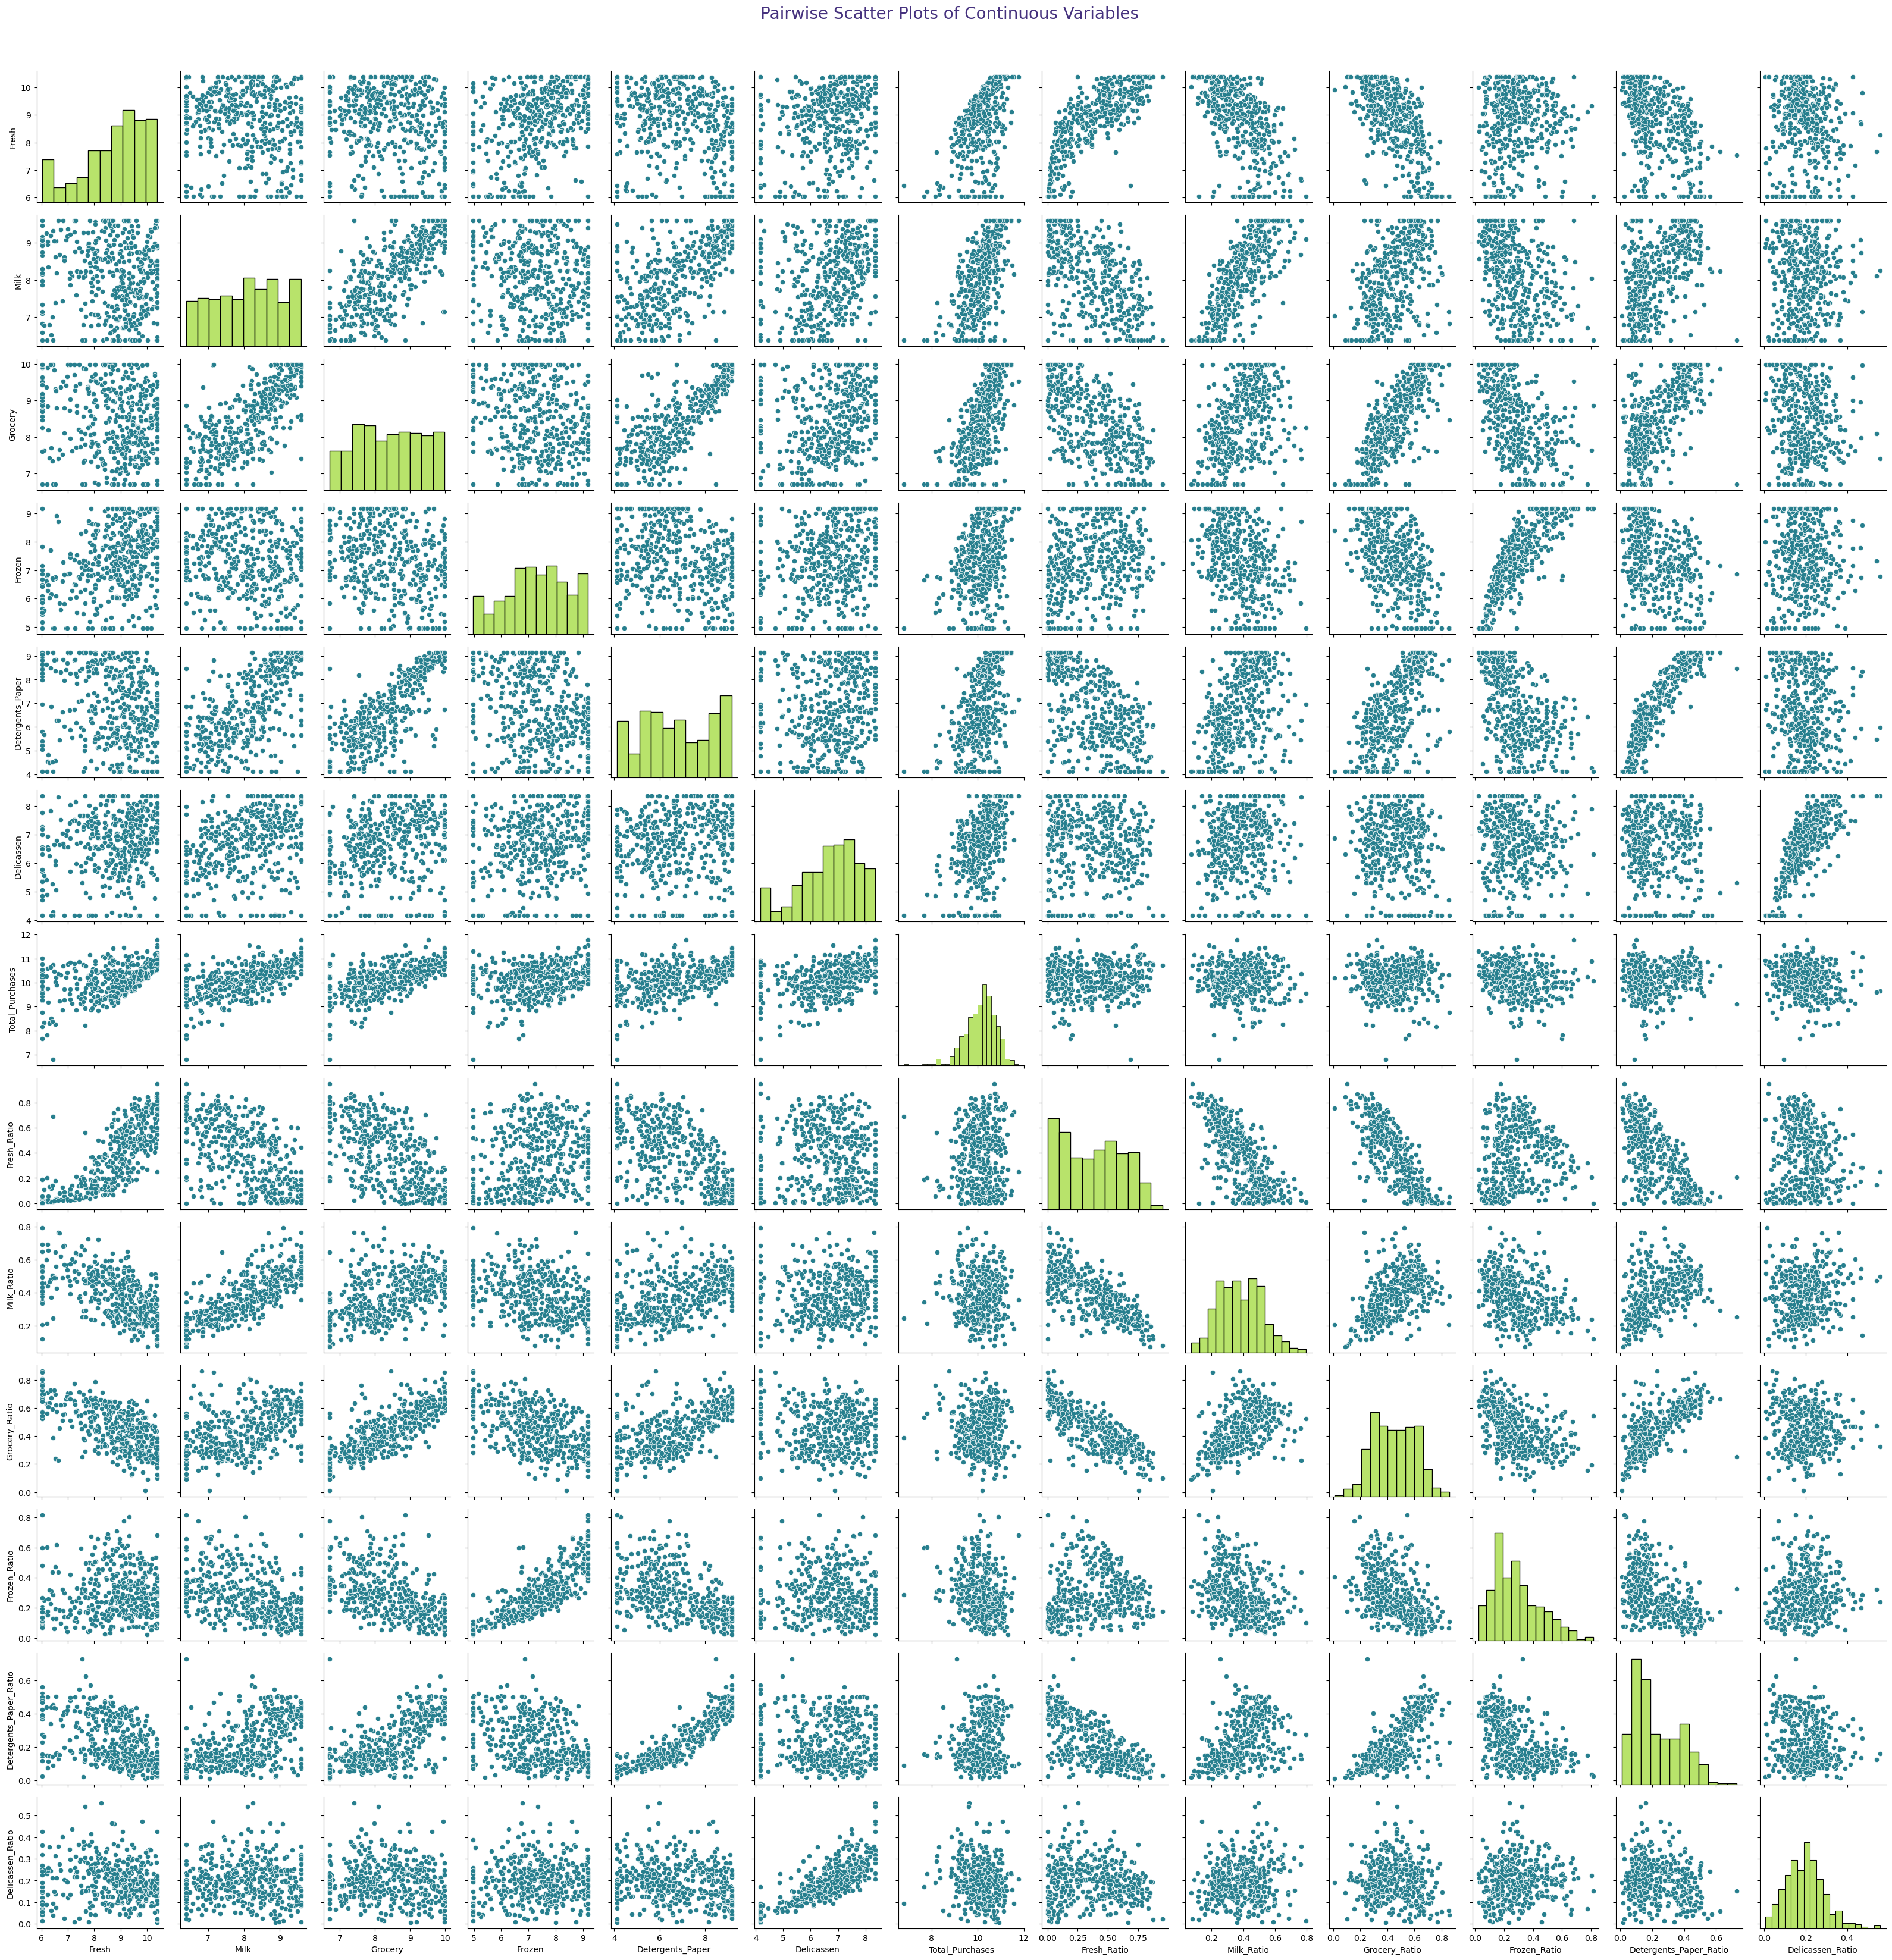

In [500]:
# Plotting
pair_plot = sns.PairGrid(nums)
pair_plot = pair_plot.map_diag(sns.histplot,
                               color=palette_a[5])
pair_plot = pair_plot.map_offdiag(sns.scatterplot,
                                  color=palette_a[2])

plt.suptitle("Pairwise Scatter Plots of Continuous Variables",
             fontsize=20,
             fontweight='medium',
             color=palette_a[0],
             y=1.02)

#plt.tight_layout()
plt.savefig(f'{img_path}Pairwise_Scatter_Plots_NEW.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

##### Correlation Heatmap with the new columns

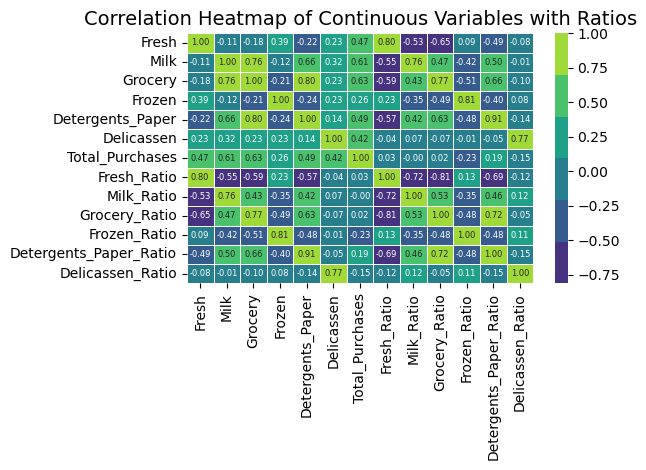

In [ ]:

# Calculate the correlation matrix
correlation_matrix = nums.corr()

plt.figsize=(12,6)
sns.heatmap(correlation_matrix,
            annot=True,
            cmap=palette_a,
            linewidths=.5,
            annot_kws={"size": 6},
            fmt=".2f")

plt.title("Correlation Heatmap of Continuous Variables with Ratios",
          fontsize=12,
          fontweight='medium')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'{img_path}Correlation_Heatmap_NEW.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##### Future Goals

1. Would be nice to have dates/historical data to track client's purchasing behavior, anticipate their possible purchases, estimate amount allocations and plan our logistics more efficiently.
2. We'd have been able to predict seasonal trends and do financial projections as well.